# Explore here

In [59]:
# Import
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Vectorize data
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting data
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score

# Utils
import warnings

warnings.filterwarnings("ignore")

In [60]:
# Get data
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv")

# Initial Data Display
df.head(10)

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
5,https://www.brookings.edu/interactives/reopeni...,False
6,https://www.reuters.com/investigates/special-r...,False
7,https://www.theatlantic.com/magazine/archive/2...,False
8,https://www.vox.com/2020/6/17/21294680/john-bo...,False
9,https://www.theguardian.com/travel/2020/jun/18...,False


In [61]:
# DataFrame Dimensions
df.shape

(2999, 2)

In [62]:
# Basic Information on Data Types and Non-Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


In [63]:
# Search and Removal of Duplicate Data
duplicates = df.duplicated().sum()
print(duplicates)

# If Necessary
df = df.drop_duplicates()

630


In [64]:
# DataFrame Dimensions
df.shape

(2369, 2)

is_spam
False    2125
True      244
Name: count, dtype: int64


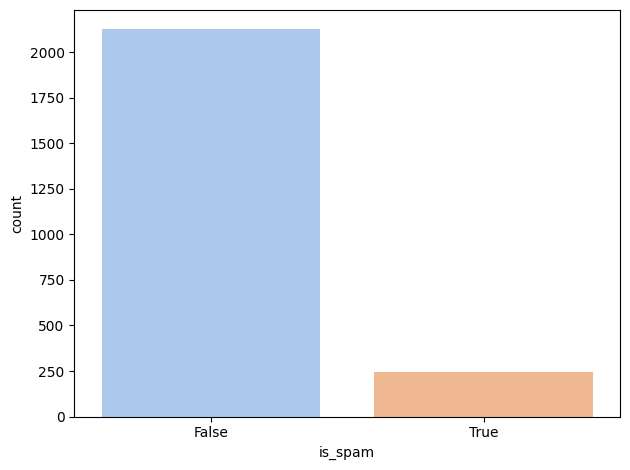

In [65]:
# Balancing analysis in variable to be predicted
print(df["is_spam"].value_counts())

sns.countplot(data = df, x = "is_spam", palette='pastel', hue= "is_spam", legend=False)
# Adjust the Layout
plt.tight_layout()
# Display the Plot
plt.show()

In [66]:
def clean_url(texto):
    cleaned = texto.lower()
    # Elimino http y https
    cleaned = re.sub(r'https?://', ' ', cleaned)
    # Reemplazo símbolos no informativos por espacios
    cleaned = re.sub(r'[#?=&%_+:;]', ' ', cleaned)
    # Sustituyo puntos, barras y guiones por espacio
    cleaned = re.sub(r'[./-]', ' ', cleaned)
    # Sustituyo valores de dominios por espacio
    cleaned = re.sub(r'\b(?:www|com|org|net|io|gov|edu|xyz|es)\b', ' ', cleaned)
    # Elimino números aislados (pero no los dentro de palabras)
    cleaned = re.sub(r'\b\d+\b', ' ', cleaned)
    # Eliminar palabras de una sola letra
    cleaned = re.sub(r'\b[a-zA-Z]\b', ' ', cleaned)

    return cleaned.split()

In [67]:
df["url"] = df["url"].apply(clean_url)
df.head(10)

,url,is_spam
0,"[briefingday, us8, list, manage, unsubscribe]",True
1,[hvper],True
2,"[briefingday, v4n3i4f3]",True
3,"[briefingday, commentform]",False
4,"[briefingday, fan]",True
5,"[brookings, interactives, reopening, america, ...",False
6,"[reuters, investigates, special, report, healt...",False
7,"[theatlantic, magazine, archive, supermarkets,...",False
8,"[vox, john, bolton, book, excerpts, trump, ukr...",False
9,"[theguardian, travel, jun, end, of, tourism, c...",False
